**Заголовок:** Приоритизация гипотез и анализ A/B-теста для увеличения выручки интернет-магазина.

**Описание проекта:** В условиях высокой конкуренции на рынке электронной коммерции важно постоянно искать новые способы увеличения выручки. В рамках данного проекта я, как аналитик крупного интернет-магазина, работаю вместе с отделом маркетинга над приоритизацией гипотез, направленных на повышение доходов. Основная задача — провести A/B-тестирование выбранных гипотез и проанализировать их результаты, чтобы определить наиболее эффективные стратегии для увеличения выручки.

**Цель исследования:** Приоритизация гипотез, предложенных отделом маркетинга, и проведение A/B-теста для определения наиболее эффективных стратегий увеличения выручки интернет-магазина.

**Ход исследования:**

- **Приоритизация гипотез:** Оценка и ранжирование гипотез с использованием таких методов, как ICE (Impact, Confidence, Ease) и RICE (Reach, Impact, Confidence, Effort) для определения наиболее перспективных.
- **Подготовка к A/B-тесту:** Определение параметров теста, таких как выборка пользователей, длительность теста и ключевые метрики для оценки.
- **Проведение A/B-теста:** Запуск теста и сбор данных по двум группам пользователей: контрольной и экспериментальной.
- **Анализ результатов A/B-теста:** Оценка статистической значимости результатов, сравнение ключевых метрик между группами и определение эффективности тестируемых гипотез. В ходе эксперимента основное внимание было уделено анализу среднего количества заказов на посетителя и среднего чека. Эти две метрики являются основными индикаторами эффективности для большинства e-commerce экспериментов, так как они позволяют оценить, вырос ли доход на посетителя и как изменение поведения пользователей может способствовать увеличению выручки.
- **Формулировка выводов и рекомендаций:** На основе результатов теста предоставление рекомендаций по внедрению наиболее успешных стратегий для увеличения выручки.

**Общий вывод:** Резюмирование результатов приоритизации гипотез и A/B-теста, формулировка ключевых выводов и рекомендаций для отдела маркетинга.

С помощью данного исследования мы стремимся определить наиболее эффективные стратегии для увеличения выручки интернет-магазина, что позволит оптимизировать маркетинговые усилия и повысить общую эффективность бизнеса.

# Часть 1. Приоритизация гипотез
- ICE и RICE фреймворки помогут приоритизировать гипотезы.
    - Сначала вычислим и отсортируем метрики по убыванию, чтобы увидеть наибольшие значения.
    - После этого сравним результаты для ICE и RICE: добавление Reach в RICE может изменить порядок гипотез, особенно если у гипотезы высокий охват (Reach) при прочих равных.
- При сравнении результатов, можно будет объяснить, как охват (Reach) влияет на приоритет гипотезы. Если гипотеза с низким охватом, но высоким Impact и Confidence, то ICE поставит её выше, а в RICE приоритет может сместиться.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# Загрузка данных
hypothesis_data = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 100
# Проверим данные
print(hypothesis_data.info())
display(hypothesis_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Все здорово, но я приведу столбцы к нижнему регистру для последующего удобства.

In [3]:
hypothesis_data.columns = hypothesis_data.columns.str.lower()

<b>Расчитаем ICE: Impact * Confidence / Effort

In [4]:
# Расчитаем ICE
hypothesis_data['ICE'] = ((hypothesis_data['impact'] * hypothesis_data['confidence']) / hypothesis_data['efforts']).round(2)

# Отсортируем гипотезы по ICE в порядке убывания
ice_prioritization = hypothesis_data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
print("Приоритизация гипотез по ICE:")
display(ice_prioritization)

Приоритизация гипотез по ICE:


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<b>Расчитаем RICE: Reach * Impact * Confidence / Effort

In [5]:
# Расчитаем RICE
hypothesis_data['RICE'] = (hypothesis_data['reach'] * hypothesis_data['impact'] * hypothesis_data['confidence']) / hypothesis_data['efforts']

# Отсортируем гипотезы по RICE в порядке убывания
rice_prioritization = hypothesis_data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
print("Приоритизация гипотез по RICE:")
display(rice_prioritization)

Приоритизация гипотез по RICE:


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<b>Теперь сравним результаты

In [6]:
# Для удобства создадим таблицу с обоими значениями и выведем их рядом
prioritization_comparison = hypothesis_data[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)
print("Сравнение приоритизации гипотез по ICE и RICE:")
display(prioritization_comparison)

Сравнение приоритизации гипотез по ICE и RICE:


,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


<b>Промежуточные выводы:</b>
- По ICE гипотеза 7 (добавить форму подписки) была третьей, но по RICE поднялась на первое место. Охват аудитории (reach = 10) сыграл ключевую роль в повышении её приоритета, так как подписка может быстро затронуть большую часть пользователей.
- По ICE гипотеза 2 (добавить блоки рекомендаций товаров) находилась в середине списка. С учётом высокого охвата (reach = 8) она поднялась на второе место по RICE. Рекомендации предполагают высокую вероятность вовлечения широкой аудитории, что усиливает её значимость в рамках RICE.
- Гипотеза 8 (запустить акцию с днём рождения) лидировала по ICE, но по RICE опустилась на пятое место. Несмотря на высокий показатель влияния (impact = 9) и уверенности (confidence = 9), её охват (reach = 1) ограничивает эффект. Это предполагает, что акция будет полезна для сравнительно небольшой группы пользователей.
- Гипотезы 3, 1, 5, и 4 остались на низких позициях. Низкие показатели охвата, уверенности, либо влияния у этих гипотез не позволили им занять высокие места. Например, изменение цвета фона страницы (гипотеза 4) имеет минимальное влияние и остаётся последней в обоих рейтингах.

# Часть 2. Анализ A/B-теста

<b>Краткий план:</b>
- Загрузим данные о заказах и пользователях.
- Подготовим кумулятивные метрики для каждой группы.
- Построим графики для кумулятивной выручки и других метрик.
- Применим статистические тесты для проверки значимости различий.

## Загрузим данные и сразу проверим

In [7]:
# Загрузим данные
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

# Проверим их
display(orders.info())
display(orders.head())

display(visitors.info())
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Пропуски отсутствуют, хорошо!

<b>Разберемся с типами данных

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

## Соберем кумулятивную дату в одну таблицу:

In [9]:
# Создадим датафрейм с уникальными парами значений 'date' и 'group'. Избавимся от дубликатов.
datesGroups = orders[['date','group']].drop_duplicates() 
# Объявим переменную, где содержится число уникальных заказов в группе теста по указанную дату включительно и число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# Объявим переменную, где содержится количество уникальных посетителей в группе теста по указанную дату включительно
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединим переменные в новую таблицу
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Построим графики кумулятивной выручки по дням по группам.
- Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. 

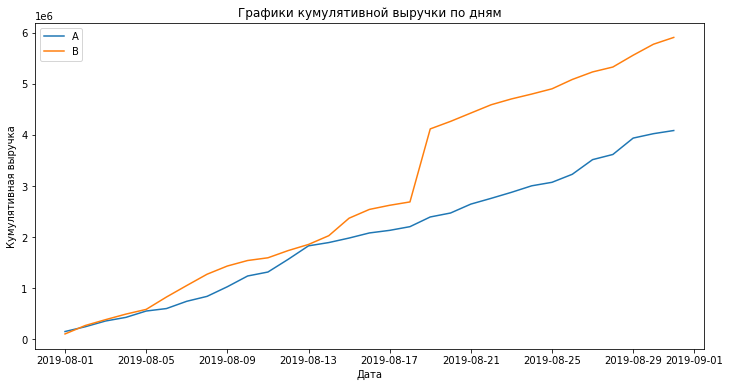

In [36]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Графики кумулятивной выручки по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.show()

Группа B существенно опережает группу A по кумулятивной выручке, в основном за счет резкого скачка в середине периода, что может быть вызвано промо-акциями, скидками или другими стимулирующими мерами, которые повлияли на выручку. Более высокий общий доход группы B также может свидетельствовать о более высоком среднем чеке или большем количестве заказов.

## Построим графики кумулятивного среднего чека по дням.

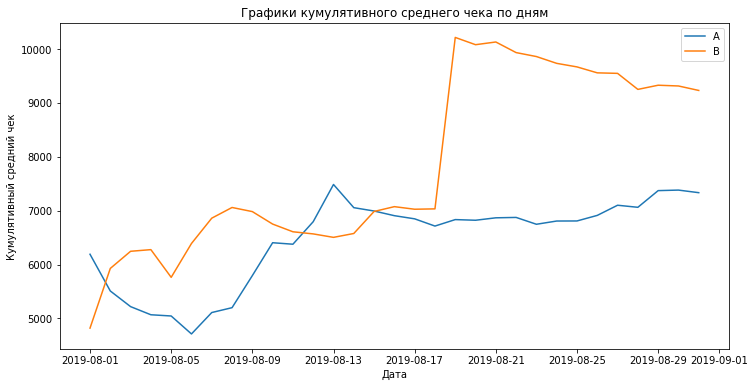

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по дням')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()
plt.show()

Мы видим, как в первой половине теста происходили колебания, после чего сегмент В сильно оторвался от А, что, возможно, указывает на изменившиеся условия для пользователей этой группы. К концу графики стабилизируются.

## Построим график относительно различия кумулятивного среднего чека группы B к группе A. 
- Объединим таблицы cumulativeRevenueA и cumulativeRevenueB. Сохраним в переменной mergedCumulativeRevenue. 

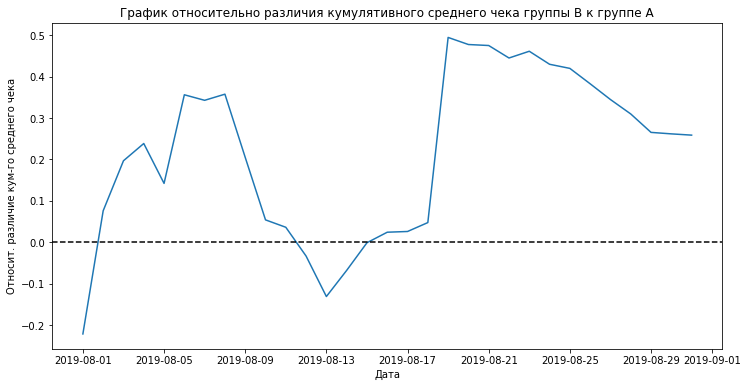

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относит. различие кум-го среднего чека')
plt.show()

Из графика видно, что результаты теста значительно менялись в несколько дат. Возможно тогда были совершены аномальные заказы.

## Построим графики кумулятивного среднего количества заказов на посетителя по группам и по дням.
- Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
- Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраним данные о заказах в сегментах A и B соответственно.

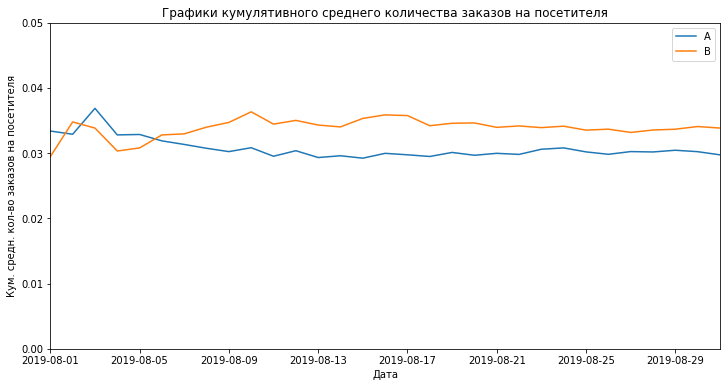

In [38]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Графики кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Кум. средн. кол-во заказов на посетителя')
plt.legend()

# задаем масштаб осей
#plt.axis(["2019-08-01", "2019-08-31", 0, 0.05])
plt.xlim(pd.to_datetime("2019-08-01"), pd.to_datetime("2019-08-31"))
plt.ylim(0, 0.05)

plt.show()

В начале теста сегмент А имел большее кумулятивное среднее кол-во заказов, но постепенно сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А

## Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

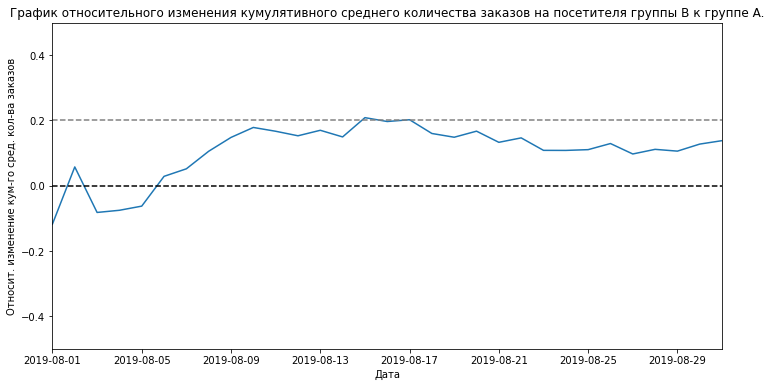

In [52]:
# Объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.xlabel('Дата')
plt.ylabel('Относит. изменение кум-го сред. кол-ва заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
#plt.axis(["2019-08-01", "2019-08-31", -0.5, 0.5]) 
plt.xlim(pd.to_datetime("2019-08-01"), pd.to_datetime("2019-08-31"))
plt.ylim(-0.5, 0.5)
plt.show()

Из графика видно, что почти с самого начала теста группа В лидирует по метрике, доходя до прироста в 20%, но позже фиксируясь в отметке 10-15%.

## Построим гистограмму распределения числа заказов по пользователям

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


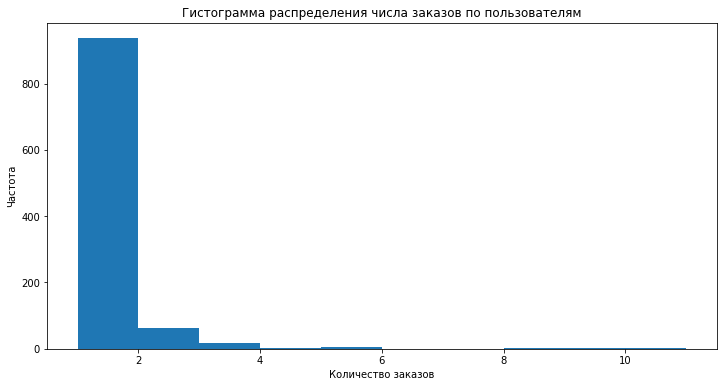

In [45]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
plt.figure(figsize=(12, 6))
plt.hist(ordersByUsers['orders']) 
plt.title('Гистограмма распределения числа заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

Большинство пользователей совершило всего 1 заказ. Однако не ясно, сколько пользователей заказало 2,3 и более раза. Для этого построим другой график.

## Построим точечный график количества заказов по пользователям.

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


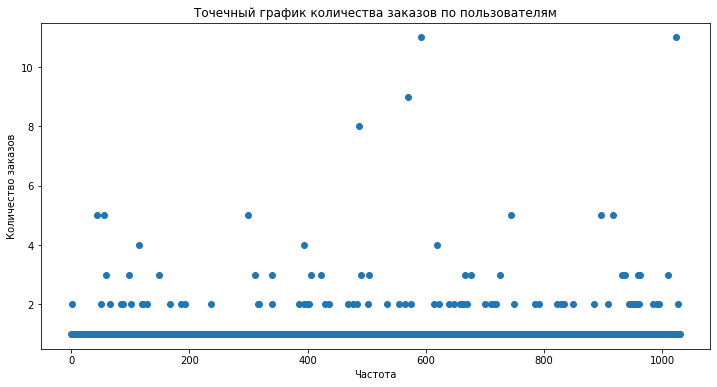

In [47]:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Частота')
plt.ylabel('Количество заказов')
plt.show()

Пользователей, заказавших более двух раз - мало. Они могут быть аномальными. Чтобы понять 2 заказа - это нормально или много, посчитаем выборочные перцентили.

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [17]:
print("95-й и 99-й выборочные перцентили:", np.percentile(ordersByUsers['orders'], [95, 99])) 

95-й и 99-й выборочные перцентили: [2. 4.]


Выходит, что не более 5% пользователей совершали больше 2 заказов. И не более 1% пользователей - больше 4 заказов.

## Построим точечный график стоимостей заказов.

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


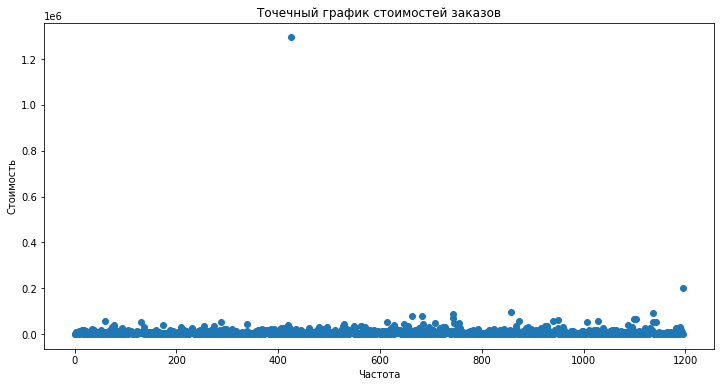

In [49]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Частота')
plt.ylabel('Стоимость')
plt.show()

Сумма большинства заказов меньше 200 тыс. Однако есть один заказ стоимостью 200 тыс. и один заказ стоимостью свыше 1.2 млн.

## Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [19]:
print("95-й и 99-й выборочные перцентили:", np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й выборочные перцентили: [28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000 руб., и не больше, чем у 1% заказов - дороже 58233 руб.

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:
- <b>Нулевая</b>: различий в среднем количестве заказов между группами нет.
- <b>Альтернативная</b>: различия в среднем между группами есть.

Начнём с подготовки данных. 

In [20]:
# Отбираем только данные для группы A и переименовываем столбцы для читабельности
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# Считаем кумулятивное количество посетителей для группы A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# Аналогично для группы B: выбираем и переименовываем столбцы
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# Считаем кумулятивное количество посетителей для группы B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# Считаем количество заказов и выручку по дням для группы A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# Считаем кумулятивное количество заказов и выручку для группы A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# Аналогично для группы B: считаем количество заказов и выручку по дням
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# Считаем накопительное количество заказов и выручку для группы B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# Объединяем все рассчитанные данные в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [21]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.

In [22]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем p-value и относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1

In [23]:
# Вычисляем p-value
print("p-value: ", "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# Считаем относительное изменение среднего количества заказов на посетителя между группами B и A
print("Относительный прирост среднего числа заказов группы B:","{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value:  0.01679
Относительный прирост среднего числа заказов группы B: 0.138


- p-value ниже уровня значимости 0.05. Это значит, что мы можем отвергнуть нулевую гипотезу о том, что нет разницы в среднем количестве заказов на посетителя между группами. То есть различие между группами статистически значимо.

- Относительное изменение = 0.138 (или 13.8%): Группа B имеет среднее количество заказов на посетителя на 13.8% выше, чем группа A.

- <b>Выводы</b>: С учётом того, что различие статистически значимо, а группа B показывает заметный рост среднего количества заказов, можно сделать вывод, что изменения, применённые в группе B, имели положительное влияние на эту метрику.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

- <b>Нулевая гипотеза</b>: различий в среднем чеке между группами нет. 
- <b>Альтернативная гипотеза</b>: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами:

In [24]:
print("p-value:", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное изменения среднего чека между группами:", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительное изменения среднего чека между группами: 0.259


- p-value значительно выше уровня значимости 0.05, что означает, что различие в среднем чеке между группами A и B не является статистически значимым. То есть мы не можем отвергнуть нулевую гипотезу о том, что средний чек в группах одинаков.

- Относительное изменение среднего чека = 0.259 (или 25.9%): Несмотря на то, что относительное изменение среднего чека между группами B и A составляет 25.9%, это изменение не является статистически значимым, поскольку p-value слишком высоко. Это означает, что наблюдаемое изменение могло быть вызвано случайными факторами.

- <b>Выводы</b>: Несмотря на то, что в данных наблюдается рост среднего чека на 25.9% в группе B по сравнению с группой A, это изменение не является статистически значимым. Таким образом, на основе текущих данных мы не можем утверждать, что изменения в группе B действительно повлияли на средний чек.

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.


- Напомним, что найденные 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

- Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

- Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [25]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
68


Всего 68 аномальных пользователей. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [27]:
print("p-value:", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост среднего числа заказов группы B:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
Относительный прирост среднего числа заказов группы B: 0.172


- p-value: В обоих случаях (и по неочищенным, и по очищенным данным) меньше 0.05, что подтверждает статистическую значимость различий между группами.
- Относительное изменение среднего числа заказов: По очищенным данным относительное изменение оказалось немного больше (17.2% против 13.8%).
- <b>Вывод</b>: результаты по обеим выборкам (очищенным и неочищенным) показывают статистически значимые различия, но по очищенным данным разница между группами B и A немного больше. Очистка данных позволила более точно оценить эффект, убрав влияние выбросов или других аномалий, которые могли бы исказить результат в неочищенных данных.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Посмотрим, произошли ли что-нибудь с результатами по среднему чеку?

In [28]:
print("p-value:",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительное изменения среднего чека между группами:",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.720
Относительное изменения среднего чека между группами: -0.023


- p-value также, как и в сырых данных (0.729) значительно больше 0.05, что подтверждает отсутствие статистически значимых различий между группами A и B.
- Относительное изменение = -0.023 (или -2.3%): Это отрицательное изменение, указывающее на снижение среднего чека в группе B по сравнению с группой A, но, как и в случае с сырыми данными, это изменение также не является статистически значимым, из-за большого значения p-value.
- После очистки данных можно сказать, что в целом статистическая значимость различий отсутствует.

<b>Давайте соберем результаты теста в одном месте:

<p>
<b>стат. значимость различий в среднем количестве заказов на посетителя между группами</b><br>
<u>по «сырым» данным:</u><br>
p-value:  0.01679<br>
Относительный прирост среднего числа заказов группы B: 0.138<br>
<u>по «очищенным» данным.</u><br>
p-value 0.013<br>
Относительный прирост среднего числа заказов группы B: 0.172
</p>
<p>
<b>стат. значимость различий в среднем чеке заказа между группами</b><br>
    <u>по «сырым» данным.</u><br>
p-value: 0.729<br>
Относительное изменения среднего чека между группами: 0.259<br>
<u>по «очищенным» данным</u><br>
p-value: 0.720<br>
Относительное изменения среднего чека между группами: -0.023
</p>

# Выводы:

Принятие решения по результатам теста. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

На основе результатов, полученных в ходе статистических тестов, можно сделать следующие выводы:

- Средний чек: p-value (0.729 и 0.720) значительно больше 0.05, что указывает на отсутствие статистически значимых различий в среднем чеке между группами.
- Среднее количество заказов на посетителя: хотя p-value для очищенных данных (0.013) и показало статистическую значимость, относительное изменение между группами составляет всего 0.172 (или 17.2%). Вряд ли это можно назвать большим эффектом.

- Более логичным решением для меня представляется остановить тест, зафиксировать отсутствие различий между группами, так как результаты тестов по среднему чеку и конверсии не показали значимых различий. Хотя для среднего количества заказов на посетителя было выявлено некоторое изменение, оно не является достаточным, чтобы сделать вывод о значимом улучшении. Продолжение теста может быть затратным, если не ожидается более явных изменений.